In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

path = './Raw_Data/'

# Project Exploration

For my 2nd project at Metis, our assignment is to build a linear regression model to predict a numerical outcome. Requirements are that:
* we scrape some amount of data from the web
* we must use linear regression
* avoid data leakage

## Money (foot)ball

Collecting sports collectable cards as a kid, I had always been fascinated by sports statistics. That was notched up a few degrees after reading one of my favorite books of all time by one of my favorite authors, Michael Lewis. At the same time, I feel statistics in sports is already heavily studied and I was hesitant as a question the originality of my question: **how many passing TDs will a quarterback have in a season?**

I wanted to get an overall feel for what data is available and perform some preliminary EDA to figure out what features I wanted to use, and to be quite frank, see if this question really excited me.

In [4]:
# Import select data from https://www.footballdb.com/
raw_data = pd.read_excel(path+'NFL_QB_EDA.xlsx', index_col=0)
mod_data = raw_data.copy()

In [5]:
mod_data.head()

,Player,Gms,Att,Cmp,Pct,Yds,Int,TD,Lg,Rating
1,"Drew Brees, 2001-20",275,10161,6867,67.6,77416,237,547,98t,98.4
2,"Tom Brady, 2000-20",285,9988,6377,63.8,74571,179,541,99t,97.0
3,"Philip Rivers, 2004-20",228,7591,4908,64.7,59271,198,397,84t,95.1
5,"Ben Roethlisberger, 2004-20",218,7230,4651,64.3,56545,191,363,97t,94.0
6,"Matt Ryan, 2008-20",189,6817,4460,65.4,51186,147,321,93t,94.6


## Notes and brainstorming

### Phase I Features
In my head the initial features I want to select are the basics:
* Age
* Years in the league
* Game Started (cum)
* QB rating (avg to date)
* Attempts (avg to date)
* Completions (avg to date)
* Yards (avg to date)
* Interceptions (avg to date)
* TDs (avg to date)

To get this to work I need to:
1) Gather QB stats
2) Put all the QBs in the data in a tier/bucket
3) Calculate a cumulative
4) Y would be TDs shifted down a year

### Phase II Features
* Coach's avg passing play calls 
* Coach's avg running play calls
* Number of games sat out for injury
* Number of surgeries
* Select advanced QB stats

### Issues
* rookies
* trends in way the game is played (much more passing). I'm thinking I'll have a cutoff date on QBs to analyze based on the passing trend
* QB tiers. Thinking about having a categorical data to group the QBs by. One of the issues I'm hoping to address below is how to bin/tier the QBs. One idea is to bin and then measure the statistical difference among the average tiered QB ratings to make sure they've been sufficiently binned?

### How will it work?
Use player's career stats to date

# insert equation for QB rating here

In [6]:
mod_data[['Name','Yrs Active']] = mod_data['Player'].str.split(',', expand=True)

In [7]:
mod_data.drop('Player', axis=1, inplace=True, errors='ignore')

In [8]:
mod_data['Yrs Active'] = mod_data['Yrs Active'].str.split('-')

In [9]:
current_yr = 2020
mod_data['Yrs Played'] = current_yr - mod_data['Yrs Active'].apply(lambda x: int(x[0]))

In [10]:
mod_data = mod_data[['Name','Gms', 'Att', 'Cmp', 'Pct', 'Yds', 'Int', 'TD', 'Lg', 'Rating',
       'Yrs Active', 'Yrs Played']]

In [11]:
mod_data['norm rating'] = (mod_data['Rating'] - mod_data['Rating'].mean()) / mod_data['Rating'].std()

In [12]:
mod_data.sort_values(by='norm rating', ascending=False, inplace=True)
mod_data

,Name,Gms,Att,Cmp,Pct,Yds,Int,TD,Lg,Rating,Yrs Active,Yrs Played,norm rating
34,Patrick Mahomes,31,1099,724,65.9,9412,18,76,89t,108.9,"[ 2017, 20]",3,2.336528
7,Aaron Rodgers,181,6061,3913,64.6,46946,84,364,93t,102.4,"[ 2005, 20]",15,1.498936
13,Russell Wilson,128,3777,2436,64.5,29734,68,227,80t,101.2,"[ 2012, 20]",8,1.344304
32,Deshaun Watson,38,1204,804,66.8,9716,29,71,73t,101.0,"[ 2017, 20]",3,1.318532
1,Drew Brees,275,10161,6867,67.6,77416,237,547,98t,98.4,"[ 2001, 20]",19,0.983495
2,Tom Brady,285,9988,6377,63.8,74571,179,541,99t,97.0,"[ 2000, 20]",20,0.803091
23,Dak Prescott,64,2071,1363,65.8,15778,36,97,90t,97.0,"[ 2016, 20]",4,0.803091
16,Kirk Cousins,93,3146,2104,66.9,24107,71,155,81t,96.8,"[ 2012, 20]",8,0.777318
3,Philip Rivers,228,7591,4908,64.7,59271,198,397,84t,95.1,"[ 2004, 20]",16,0.558256
6,Matt Ryan,189,6817,4460,65.4,51186,147,321,93t,94.6,"[ 2008, 20]",12,0.493826


In [13]:
mod_data.describe(include='all')

,Name,Gms,Att,Cmp,Pct,Yds,Int,TD,Lg,Rating,Yrs Active,Yrs Played,norm rating
count,31,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31,31.000000,31,31.000000,3.100000e+01
unique,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,12,NaN,NaN
top,Andy Dalton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80t,NaN,"[ 2012, 20]",NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,6,NaN,NaN
mean,NaN,118.129032,3818.193548,2427.129032,63.054839,28177.741935,88.322581,181.548387,NaN,90.767742,NaN,9.935484,-1.618777e-15
std,NaN,69.727442,2546.592788,1669.699409,2.514603,19405.519306,59.361260,139.181857,NaN,7.760343,NaN,4.753493,1.000000e+00
min,NaN,31.000000,1099.000000,724.000000,56.200000,9063.000000,18.000000,43.000000,NaN,71.700000,NaN,3.000000,-2.457075e+00
25%,NaN,63.500000,1817.000000,1135.500000,61.900000,13083.500000,39.000000,75.500000,NaN,87.100000,NaN,7.000000,-4.726263e-01
50%,NaN,94.000000,3197.000000,2104.000000,63.100000,23176.000000,71.000000,143.000000,NaN,89.800000,NaN,9.000000,-1.247035e-01
75%,NaN,160.500000,5318.500000,3320.500000,64.550000,37067.500000,126.000000,222.500000,NaN,95.950000,NaN,13.500000,6.677872e-01


In [20]:
mod_data['qb tier'] = pd.qcut(mod_data['norm rating'], 4, labels = [x for x in range(4,0,-1)])

In [21]:
# mod_data.to_pickle('active_qb_df.pkl')

Text(0, 0.5, 'Standard Deviation from Avg')

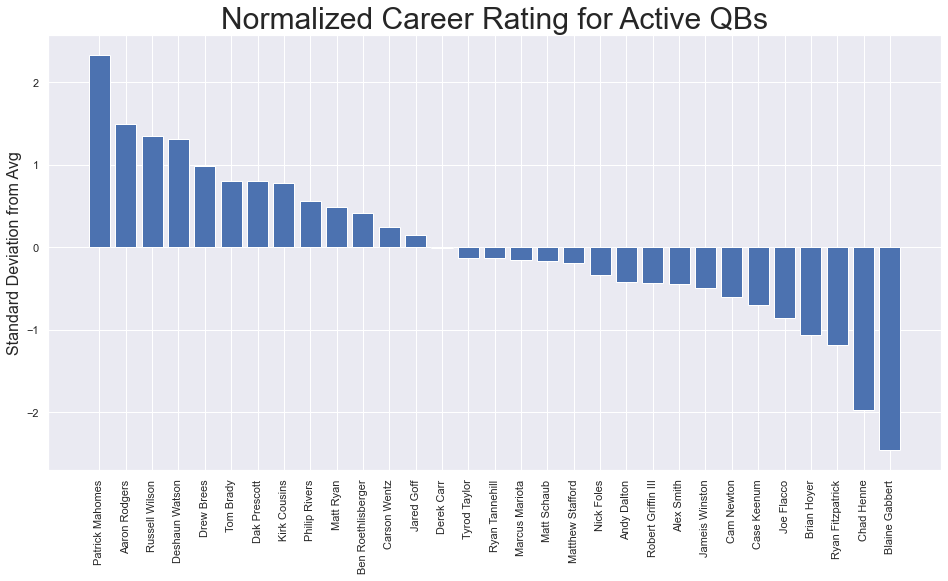

In [13]:
plt.figure(figsize = (16,8))
x = mod_data['Name']
y = mod_data['norm rating']
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Normalized Career Rating for Active QBs', fontsize=30)
plt.ylabel('Standard Deviation from Avg', fontsize=16)

OK, I can't lie. Even if it's not the most original question, I'm pretty excited to try this out

## NFL passing trends

In [23]:
# Team Offense League Averages Per Team Season from pro-football-reference
raw_off_data = pd.read_csv(path + 'NFL_total_off.csv', header=1, index_col=0)

In [24]:
mod_off_data = raw_off_data.copy()

In [25]:
mod_off_data.head()

,Year,Tms,PF,Yds,Ply,Y/P,TO,FL,1stD,Cmp,...,1stD.2,Pen,Yds.3,1stPy,#Dr,Sc%,TO%,Plays,Yds.4,Pts
Rk,,,,,,,,,,,,,,,,,,,,,
1,2020,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,32,11680.0,178107.0,32516.0,5.5,711.0,301.0,10369.0,11331.0,...,3115.0,3451.0,29306.0,1054.0,5639.0,36.0,11.8,5.86,31.2,1.95
3,2018,32,11952.0,180338.0,32224.0,5.6,696.0,277.0,10462.0,11462.0,...,3206.0,3445.0,29423.0,980.0,5740.0,36.5,11.8,5.80,31.4,2.00
4,2017,32,11120.0,171040.0,32438.0,5.3,706.0,276.0,9860.0,10856.0,...,2919.0,3420.0,29580.0,1020.0,5903.0,33.8,11.4,5.69,28.9,1.78
5,2016,32,11661.0,179402.0,32734.0,5.5,700.0,285.0,10379.0,11526.0,...,3038.0,3447.0,29695.0,973.0,5853.0,35.6,11.3,5.77,30.6,1.91


In [26]:
mod_off_data.columns = ['Year', 'Tms', 'Total_pts', 'Tot_Yds', 'Tot_Plays', 'Tot_Y/P', 'Tot_TO', 'Tot_FL', 'Tot_1stD', 
                         'Pass_Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'NetYds/Att', 'Pass_1stD', 
                         'Rush_Att', 'Rush_Yds', 'Rush_TD','Rush_Yd/Att', 'Rush_1stD', 'Pen', 'Yds.3', '1stPy', '#Dr', 'Sc%', 'TO%', 'Avg_Drive_Plays', 'Avg_Drive_Yds', 'Avg_Drive_Pts']

In [27]:
# I want to drop a few data columns for penalty. I don't think that's relevant for now
mod_off_data.drop(mod_off_data.loc[:,'Pen':'TO%'], axis=1, inplace=True, errors='ignore')

In [20]:
mod_off_data.columns

Index(['Year', 'Tms', 'Total_pts', 'Tot_Yds', 'Tot_Plays', 'Tot_Y/P', 'Tot_TO',
       'Tot_FL', 'Tot_1stD', 'Pass_Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'NetYds/Att', 'Pass_1stD', 'Rush_Att', 'Rush_Yds',
       'Rush_TD', 'Rush_Yd/Att', 'Rush_1stD', 'Avg_Drive_Plays',
       'Avg_Drive_Yds', 'Avg_Drive_Pts'],
      dtype='object')

In [28]:
mod_off_data.dropna(inplace=True)

In [29]:
mod_off_data.head()

,Year,Tms,Total_pts,Tot_Yds,Tot_Plays,Tot_Y/P,Tot_TO,Tot_FL,Tot_1stD,Pass_Cmp,...,NetYds/Att,Pass_1stD,Rush_Att,Rush_Yds,Rush_TD,Rush_Yd/Att,Rush_1stD,Avg_Drive_Plays,Avg_Drive_Yds,Avg_Drive_Pts
Rk,,,,,,,,,,,,,,,,,,,,,
2,2019,32,11680.0,178107.0,32516.0,5.5,711.0,301.0,10369.0,11331.0,...,6.3,6200.0,13387.0,57806.0,447.0,4.3,3115.0,5.86,31.2,1.95
3,2018,32,11952.0,180338.0,32224.0,5.6,696.0,277.0,10462.0,11462.0,...,6.4,6276.0,13272.0,58601.0,439.0,4.4,3206.0,5.80,31.4,2.00
4,2017,32,11120.0,171040.0,32438.0,5.3,706.0,276.0,9860.0,10856.0,...,6.1,5921.0,13755.0,56170.0,380.0,4.1,2919.0,5.69,28.9,1.78
5,2016,32,11661.0,179402.0,32734.0,5.5,700.0,285.0,10379.0,11526.0,...,6.4,6368.0,13321.0,55763.0,443.0,4.2,3038.0,5.77,30.6,1.91
6,2015,32,11680.0,180567.0,32973.0,5.5,746.0,310.0,10268.0,11527.0,...,6.4,6289.0,13488.0,55724.0,365.0,4.1,2973.0,5.69,30.2,1.84


The total plays given in the raw data doesn't equal total pass attempts, rush attempts, and turnovers. Not sure what the difference is but in the interest of exploring and MVP, just looking at pass and rush plays.

In [30]:
mod_off_data['Pass+Rush_Att'] = mod_off_data['Pass_Att'] + mod_off_data['Rush_Att']

In [31]:
mod_off_data.columns

Index(['Year', 'Tms', 'Total_pts', 'Tot_Yds', 'Tot_Plays', 'Tot_Y/P', 'Tot_TO',
       'Tot_FL', 'Tot_1stD', 'Pass_Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'NetYds/Att', 'Pass_1stD', 'Rush_Att', 'Rush_Yds',
       'Rush_TD', 'Rush_Yd/Att', 'Rush_1stD', 'Avg_Drive_Plays',
       'Avg_Drive_Yds', 'Avg_Drive_Pts', 'Pass+Rush_Att'],
      dtype='object')

In [32]:
total_off_data = mod_off_data[['Year','Tms', 'Total_pts', 'Pass+Rush_Att', 'Pass_Att', 'Pass_Yds', 'Rush_Att', 'Rush_Yds']]

In [33]:
total_off_data.head()

,Year,Tms,Total_pts,Pass+Rush_Att,Pass_Att,Pass_Yds,Rush_Att,Rush_Yds
Rk,,,,,,,,
2,2019,32,11680.0,31240.0,17853.0,120301.0,13387.0,57806.0
3,2018,32,11952.0,30943.0,17671.0,121737.0,13272.0,58601.0
4,2017,32,11120.0,31243.0,17488.0,114870.0,13755.0,56170.0
5,2016,32,11661.0,31616.0,18295.0,123639.0,13321.0,55763.0
6,2015,32,11680.0,31786.0,18298.0,124843.0,13488.0,55724.0


In [34]:
total_off_data['Pass+Rush Yds'] = total_off_data['Pass_Yds'] + total_off_data['Rush_Yds']
total_off_data['% Pass Plays'] = total_off_data['Pass_Att'] / total_off_data['Pass+Rush_Att']
total_off_data['% Yds on Passes'] = total_off_data['Pass_Yds'] / total_off_data['Pass+Rush Yds']

<ipython-input-34-fae3a0002fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_off_data['Pass+Rush Yds'] = total_off_data['Pass_Yds'] + total_off_data['Rush_Yds']
<ipython-input-34-fae3a0002fb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_off_data['% Pass Plays'] = total_off_data['Pass_Att'] / total_off_data['Pass+Rush_Att']
<ipython-input-34-fae3a0002fb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [35]:
total_off_data

,Year,Tms,Total_pts,Pass+Rush_Att,Pass_Att,Pass_Yds,Rush_Att,Rush_Yds,Pass+Rush Yds,% Pass Plays,% Yds on Passes
Rk,,,,,,,,,,,
2,2019,32,11680.0,31240.0,17853.0,120301.0,13387.0,57806.0,178107.0,0.571479,0.675442
3,2018,32,11952.0,30943.0,17671.0,121737.0,13272.0,58601.0,180338.0,0.571082,0.675049
4,2017,32,11120.0,31243.0,17488.0,114870.0,13755.0,56170.0,171040.0,0.559741,0.671597
5,2016,32,11661.0,31616.0,18295.0,123639.0,13321.0,55763.0,179402.0,0.578663,0.689173
6,2015,32,11680.0,31786.0,18298.0,124843.0,13488.0,55724.0,180567.0,0.575662,0.691394
7,2014,32,11565.0,31567.0,17879.0,121247.0,13688.0,57002.0,178249.0,0.566383,0.680211
8,2013,32,11985.0,32007.0,18136.0,120626.0,13871.0,57795.0,178421.0,0.566626,0.676075
9,2012,32,11651.0,31713.0,17788.0,118418.0,13925.0,59349.0,177767.0,0.560906,0.666142
10,2011,32,11356.0,31381.0,17410.0,117601.0,13971.0,59978.0,177579.0,0.554794,0.662246


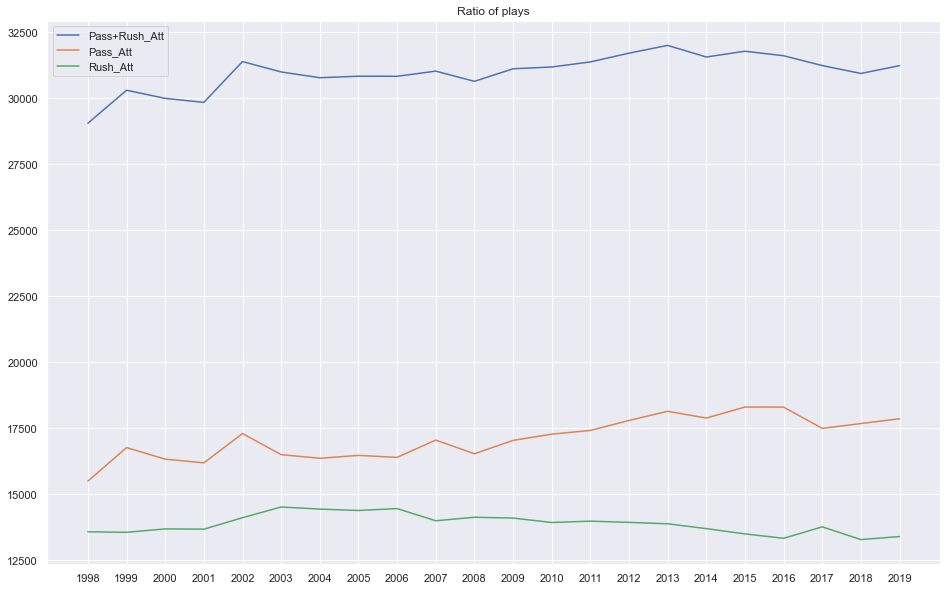

In [40]:
# change this to a stacked bar

y1 = total_off_data['Pass+Rush_Att']
y2 = total_off_data['Pass_Att']
y3 = total_off_data['Rush_Att']
x = total_off_data['Year']


plt.figure(figsize=(16,10))
att_graph = [y1, y2, y3]
for result in att_graph:
    plt.plot(x, result, label=result.name)

plt.xticks([year for year in range(1998,2020)])
plt.legend()
plt.title('Ratio of plays')

plt.show()